# **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load data set**

In [3]:
df = pd.read_csv("Unemployment in India.csv")

# **Understanding data**

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.shape

(768, 7)

In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.columns= df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [10]:
df= df.dropna()

In [11]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
df['Date']=pd.to_datetime(df['Date'], errors="coerce", dayfirst= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [14]:
df['Date'].isnull().sum()

np.int64(0)

# **Main Analysis**

In [15]:
df=df.sort_values(by='Date')

In [16]:
trend=df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
trend.head()

,Estimated Unemployment Rate (%)
Date,
2019-05-31,8.874259
2019-06-30,9.303333
2019-07-31,9.033889
2019-08-31,9.637925
2019-09-30,9.051731


In [17]:
trend.tail()

,Estimated Unemployment Rate (%)
Date,
2020-02-29,9.964717
2020-03-31,10.700577
2020-04-30,23.641569
2020-05-31,24.875294
2020-06-30,11.903600


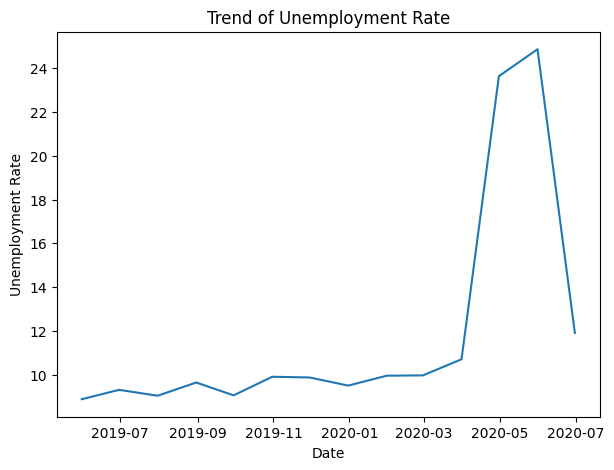

In [18]:
plt.figure(figsize=(7,5))
plt.plot(trend)
plt.title('Trend of Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

# **Before and after covid**

In [19]:
before_covid=trend['2019'].mean()
after_covid=trend['2020'].mean()
print("Befor Covid:",before_covid)
print("After Covid:",after_covid)

Befor Covid: 9.395970999606613
After Covid: 15.172751894381362


**Unemployment rose dramatically after Covid, climbing from 9.40% to 15.17%.**

# **Rural vs Urban**

In [20]:
area_avg=df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print(area_avg)

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


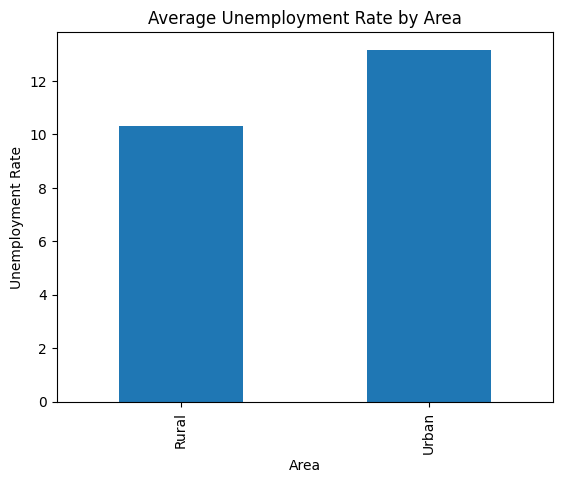

In [22]:
area_avg.plot(kind='bar')
plt.title('Average Unemployment Rate by Area')
plt.ylabel('Unemployment Rate')
plt.show()

**Unemployment is higher in urban areas (13.17%) compared to rural areas (10.32%).**

# **State wise Unemployment rate**

In [29]:
state_avg=df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print(state_avg.head())


Region
Andhra Pradesh     7.477143
Assam              6.428077
Bihar             18.918214
Chandigarh        15.991667
Chhattisgarh       9.240357
Name: Estimated Unemployment Rate (%), dtype: float64


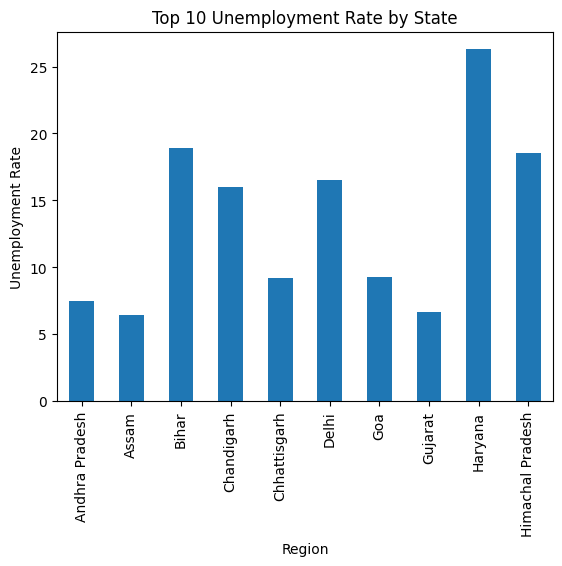

In [35]:
state_avg.head(10).plot(kind='bar')
plt.title('Top 10 Unemployment Rate by State')
plt.ylabel('Unemployment Rate')
plt.show()

**Bihar (18.92%) and Chandigarh (15.99%) record the highest unemployment rates, followed by Chhattisgarh (9.24%), Andhra Pradesh (7.48%), Assam (6.43%), and so on.**

# **Correlation Analysis**

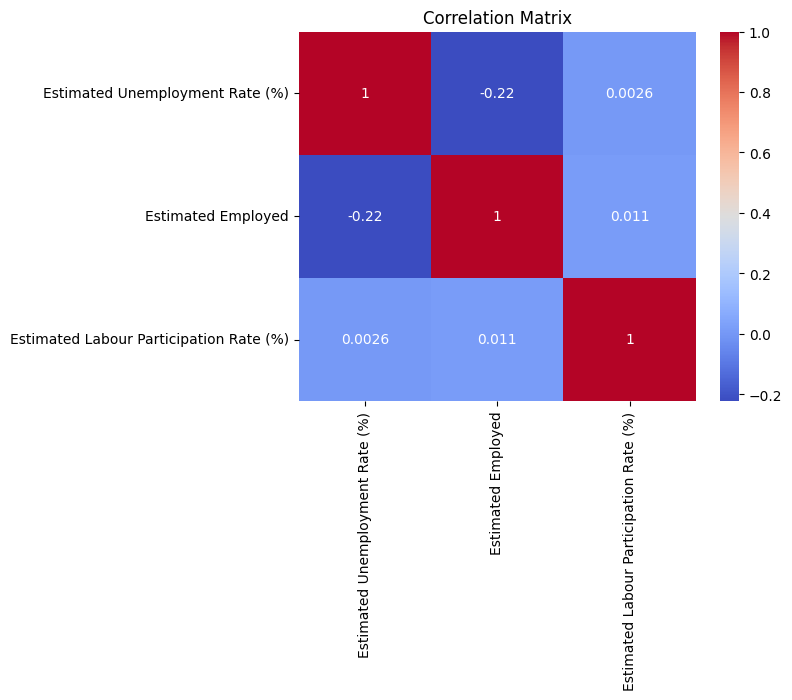

In [36]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()